Susan's workhorse notebook for looking at a variety of fields at two different times.

# Compare Two

#### Set-up and Read In

In [57]:
%matplotlib inline
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as NC
import numpy as np
from salishsea_tools import viz_tools
from salishsea_tools import tidetools

In [58]:
# Set up the two time slices here.  date1 and date2 are using for headings.  time1 and time2 are
# the time counters in the files, name1 and name2 are the files, with resultsloc their directories

date1 = 'v1'
time1 = 0
name1 = 'SalishSea_1d_20160330_20160330_grid_'
#resultsloc1 = '/ocean/sallen/allen/research/MEOPAR/myResults/NEMO36_Tides/GmO_TS7/'
resultsloc1 = '/results/SalishSea/nowcast/30mar16/'

    
date2 = 'v2'
time2 = 0
name2 =  'SalishSea_1d_20160330_20160330_grid_'
#resultsloc2 = '/ocean/sallen/allen/research/MEOPAR/myResults/NEMO36_Tides/GmO_TS8/'
resultsloc2 = '/results/SalishSea/nowcast-green/30mar16/'

In [59]:
# Tracer files 1
print (resultsloc1+name1+'T.nc')
fT1 = NC.Dataset(resultsloc1+name1+'T.nc','r')
print (fT1.variables['sossheig'].shape)
eta1 = fT1.variables['sossheig'][time1,:]
sal1 = fT1.variables['vosaline'][time1,:]
temp1 = fT1.variables['votemper'][time1,:]
depth = fT1.variables['deptht'][:]
lats = fT1.variables['nav_lat'][:]
lons = fT1.variables['nav_lon'][:]

/results/SalishSea/nowcast/30mar16/SalishSea_1d_20160330_20160330_grid_T.nc
(1, 898, 398)


In [60]:
# Tracer Files 2
print (resultsloc2+name2+'T.nc')
fT2 = NC.Dataset(resultsloc2+name2+'T.nc','r')
eta2 = fT2.variables['sossheig'][time2,:]
sal2 = fT2.variables['vosaline'][time2,:]
temp2 = fT2.variables['votemper'][time2,:]

/results/SalishSea/nowcast-green/30mar16/SalishSea_1d_20160330_20160330_grid_T.nc


In [61]:
# depth thicknesses
deldepth = np.zeros(40)
deldepth[0] = 0.5*(depth[0]+depth[1])
deldepth[1:39] = 0.5*(depth[1:39]+depth[2:40])-0.5*(depth[0:38]+depth[1:39])

In [62]:
# mask salinity, temperature and surface height (eta) arrays
m = sal1 == 0
sal1_masked = np.ma.array(sal1,mask=m)
mt = temp1 == 0
temp1_masked = np.ma.array(temp1,mask=mt)
me = eta1 == 0
eta1_masked = np.ma.array(eta1,mask=me)
m = sal2 == 0
sal2_masked = np.ma.array(sal2,mask=m)
mt = temp2 == 0
temp2_masked = np.ma.array(temp2,mask=mt)
me = eta2 == 0
eta2_masked = np.ma.array(eta2,mask=me)

#### Full Domain Surface Height Plot and Difference

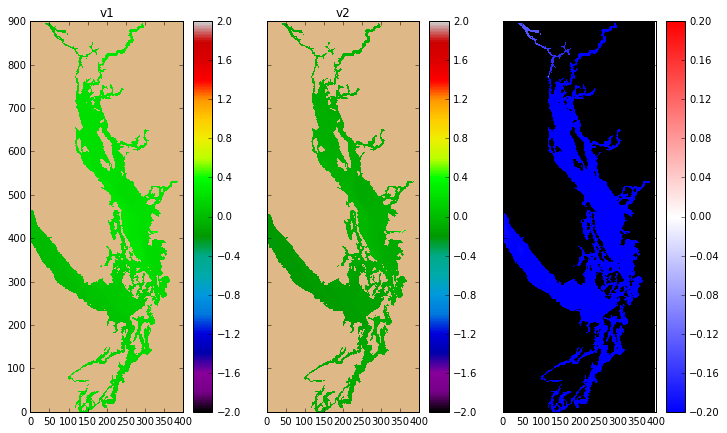

In [63]:
fig, axs = plt.subplots(1, 3, figsize=(12,7), sharey=True)
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(eta1_masked,cmap=cmap, vmax=2, vmin=-2)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(eta2_masked,cmap=cmap, vmax=2, vmin=-2)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
# third one
viz_tools.set_aspect(axs[2])
cmap = plt.get_cmap('bwr')
cmap.set_bad('black')
mesh = axs[2].pcolormesh(eta2_masked-eta1_masked,cmap=cmap, vmax = 0.2, vmin =-0.2)
cbar=fig.colorbar(mesh, ax=axs[2])

#### Plume Region Surface Temperature and Salinity Plots

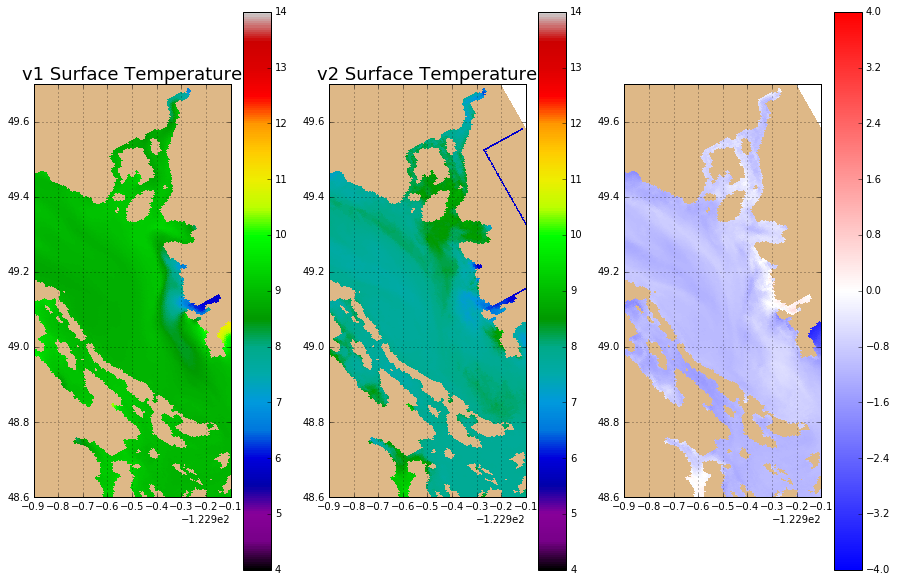

In [64]:
level = 0
vmax = 14
vmin = 4

fig, ax = plt.subplots(1, 3, figsize=(15,10))
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
viz_tools.set_aspect(ax[0],coords='map',lats = lats)
mesh = ax[0].pcolormesh(lons, lats, temp1_masked[level],cmap=cmap, vmax = vmax, vmin = vmin)
ax[0].set_title(date1+' Surface Temperature',fontsize=18)
ax[0].set_xlim((-123.8, -123.))
ax[0].set_ylim((48.6, 49.7))
ax[0].grid()
fig.colorbar(mesh, ax=ax[0])
#cbar=fig.colorbar(mesh, ax=ax[1])
ax[0].set_axis_bgcolor('burlywood')
#ax[0].set_xlabel('Latitude',fontsize=16)
#ax[0].set_ylabel('Longitude',fontsize=16)
#cbar.set_label('Salinity',fontsize=16)
viz_tools.set_aspect(ax[1],coords='map',lats=lats)
ax[1].set_title(date2+' Surface Temperature',fontsize=18)
mesh = ax[1].pcolormesh(lons, lats, temp2_masked[level],cmap=cmap, vmax = vmax, vmin = vmin)
fig.colorbar(mesh, ax=ax[1])
ax[1].set_xlim((-123.8, -123.))
ax[1].set_ylim((48.6, 49.7))
ax[1].grid()
cmap = plt.get_cmap('bwr')
cmap.set_bad('burlywood')
viz_tools.set_aspect(ax[2],coords='map',lats=lats)
mesh = ax[2].pcolormesh(lons, lats, temp2_masked[level]-temp1_masked[level], cmap = cmap, vmax = 4, vmin = -4)
ax[2].set_xlim((-123.8, -123.))
ax[2].set_ylim((48.6, 49.7))
ax[2].grid()
fig.colorbar(mesh, ax=ax[2])

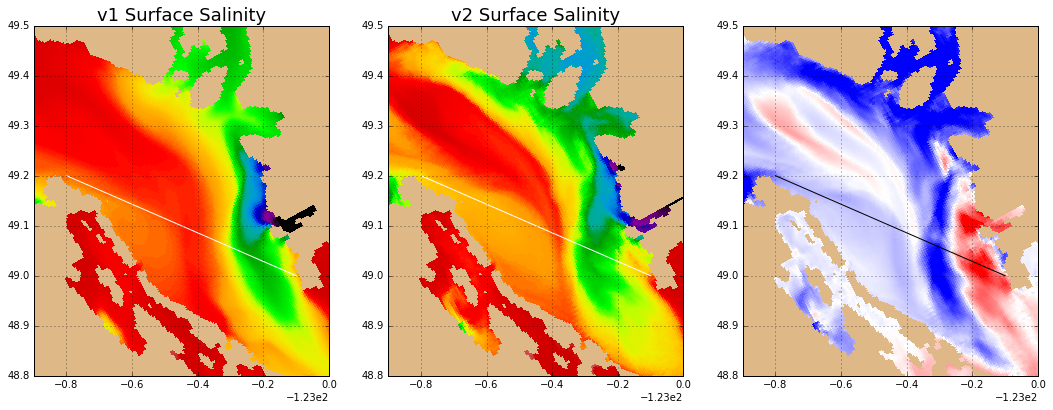

In [65]:
level = 0
lonmin = -123.9; lonmax = -123
latmin = 48.8; latmax = 49.5
vmax = 30
#slicex = np.arange(200,400)
#slicey = np.arange(300,600)
fig, ax = plt.subplots(1, 3, figsize=(18,15))
#cmap = plt.get_cmap('YlGnBu')
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
viz_tools.set_aspect(ax[0],coords='map',lats = lats)
mesh = ax[0].pcolormesh(lons, lats, sal1_masked[level],cmap=cmap, vmax=vmax, vmin=0)
ax[0].set_title(date1+' Surface Salinity',fontsize=18)
ax[0].set_xlim((lonmin, lonmax))
ax[0].set_ylim((latmin, latmax))
ax[0].grid()
#cbar=fig.colorbar(mesh, ax=ax[0])
ax[0].set_axis_bgcolor('burlywood')
ax[0].plot((-123.1,-123.8),(49,49.2),'w-')
#ax[0].set_xlabel('Latitude',fontsize=16)
#ax[0].set_ylabel('Longitude',fontsize=16)
#cbar.set_label('Salinity',fontsize=16)

viz_tools.set_aspect(ax[1],coords='map',lats=lats)
ax[1].set_title(date2+' Surface Salinity',fontsize=18)
ax[1].pcolormesh(lons, lats, sal2_masked[level],cmap=cmap, vmax=vmax, vmin=0)
ax[1].set_xlim((lonmin, lonmax))
ax[1].set_ylim((latmin, latmax))
ax[1].grid()
ax[1].plot((-123.1,-123.8),(49,49.2),'w-')

cmap = plt.get_cmap('bwr')
cmap.set_bad('burlywood')
viz_tools.set_aspect(ax[2],coords='map',lats=lats)
mesh = ax[2].pcolormesh(lons, lats, sal2_masked[level]-sal1_masked[level], cmap = cmap, vmax = 5, vmin = -5)
ax[2].set_xlim((lonmin, lonmax))
ax[2].set_ylim((latmin, latmax))
ax[2].grid()
ax[2].plot((-123.1,-123.8),(49,49.2),'k-')
#fig.colorbar(mesh, ax=ax[2])

In [66]:
grid = NC.Dataset(
        '/ocean/sallen/allen/research/MEOPAR/nemo-forcing/grid/bathy_downonegrid.nc',
        'r')
bathy = grid.variables['Bathymetry'][:, :]
X = grid.variables['nav_lon'][:, :]
Y = grid.variables['nav_lat'][:, :]

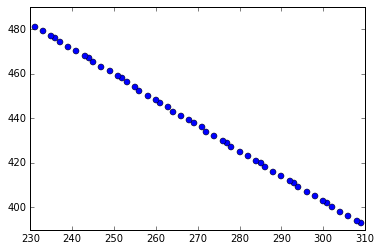

In [67]:
slats = np.linspace(49, 49.2, num=50, endpoint=True)
slons = np.linspace(-123.1,-123.8, num=50, endpoint=True)
ylat = np.zeros((50), dtype=np.int64)
xlon = np.zeros((50), dtype=np.int64)
for i, lat in enumerate(slats):
        lon = slons[i]
        ylat[i], xlon[i] = tidetools.find_closest_model_point(lon, lat, X, Y, bathy, lat_tol=0.003)
plt.plot(xlon,ylat,'o')

[393 394 396 398 400 402 403 405 407 409 411 412 414 416 418 420 421 423
 425 427 429 430 432 434 436 438 439 441 443 445 447 448 450 452 454 456
 458 459 461 463 465 467 468 470 472 474 476 477 479 481]


(-124, -123)

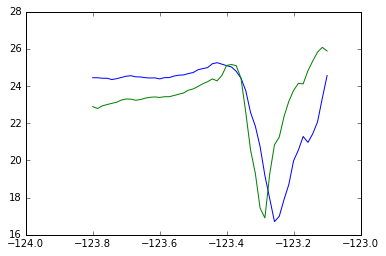

In [68]:
print (ylat)
plt.plot(slons, sal1_masked[1, ylat, xlon], 'b');
plt.plot(slons, sal2_masked[1, ylat, xlon], 'g')
plt.xlim((-124,-123))

98.063


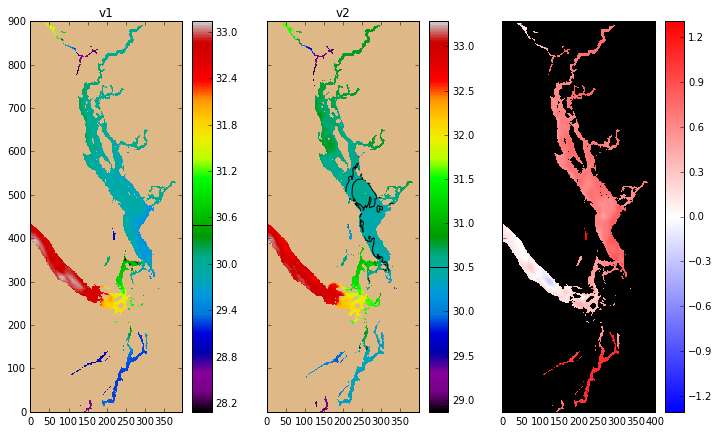

In [69]:
level = 26
vs = (15,25,30.5)
fig, axs = plt.subplots(1, 3, figsize=(12,7), sharey=True)
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
nicecolours = ('white','blue','black')
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(sal1_masked[level],cmap=cmap)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
CS=axs[0].contour(sal1_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(sal2_masked[level],cmap=cmap)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
CS=axs[1].contour(sal2_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# third one
cmap = plt.get_cmap('bwr')
cmap.set_bad('black')
viz_tools.set_aspect(axs[2])
vmax = np.max(sal2_masked[level]-sal1_masked[level])
vmin = np.min(sal2_masked[level]-sal1_masked[level])
vmax = max(vmax,-vmin)
mesh = axs[2].pcolormesh(sal2_masked[level]-sal1_masked[level],cmap=cmap,vmax=vmax,vmin=-vmax)
cbar=fig.colorbar(mesh, ax=axs[2])
print (depth[level])

0.5


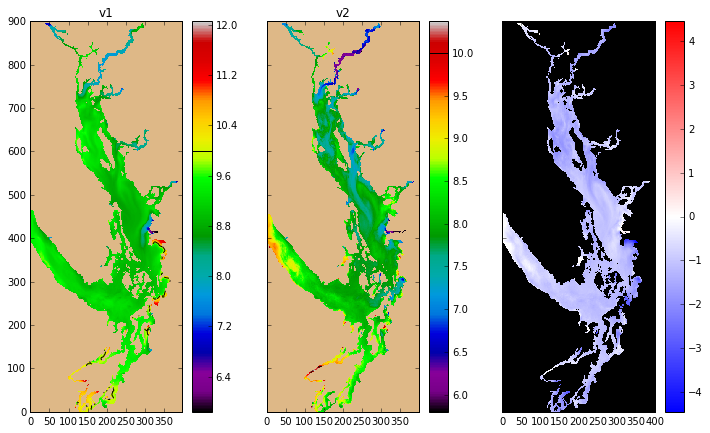

In [70]:
level = 0
vs = (0,5,10)
fig, axs = plt.subplots(1, 3, figsize=(12,7), sharey=True)
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
nicecolours = ('white','blue','black')
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(temp1_masked[level],cmap=cmap)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
CS=axs[0].contour(temp1_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(temp2_masked[level],cmap=cmap)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
CS=axs[1].contour(temp2_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# third one
cmap = plt.get_cmap('bwr')
cmap.set_bad('black')
viz_tools.set_aspect(axs[2])
vmax = np.max(temp2_masked[level]-temp1_masked[level])
vmin = np.min(temp2_masked[level]-temp1_masked[level])
vmax = max(vmax,-vmin)
mesh = axs[2].pcolormesh(temp2_masked[level]-temp1_masked[level],cmap=cmap,vmax=vmax,vmin=-vmax)
cbar=fig.colorbar(mesh, ax=axs[2])
print (depth[level])

#### Now Read in the Velocities and Mask Them

In [71]:
fU1 = NC.Dataset(resultsloc1+name1+'U.nc','r')
uvel1 = fU1.variables['vozocrtx'][time1,:]
mu = uvel1 == 0
uvel1_masked = np.ma.array(uvel1,mask=mu)
fV1 = NC.Dataset(resultsloc1+name1+'V.nc','r')
vvel1 = fV1.variables['vomecrty'][time1,:]
mv = vvel1 == 0
vvel1_masked = np.ma.array(vvel1,mask=mv)
print (uvel1.shape, time1)

(40, 898, 398) 0


In [72]:
fU2 = NC.Dataset(resultsloc2+name2+'U.nc','r')
uvel2 = fU2.variables['vozocrtx'][time2,:]
mu = uvel2 == 0
uvel2_masked = np.ma.array(uvel2,mask=mu)
fV2 = NC.Dataset(resultsloc2+name2+'V.nc','r')
vvel2 = fV2.variables['vomecrty'][time2,:]
mv = vvel2 == 0
vvel2_masked = np.ma.array(vvel2,mask=mv)
print (uvel2.shape, time2)

(40, 898, 398) 0


#### "North-South" Velocities with High Velocities Emphasized

0.5


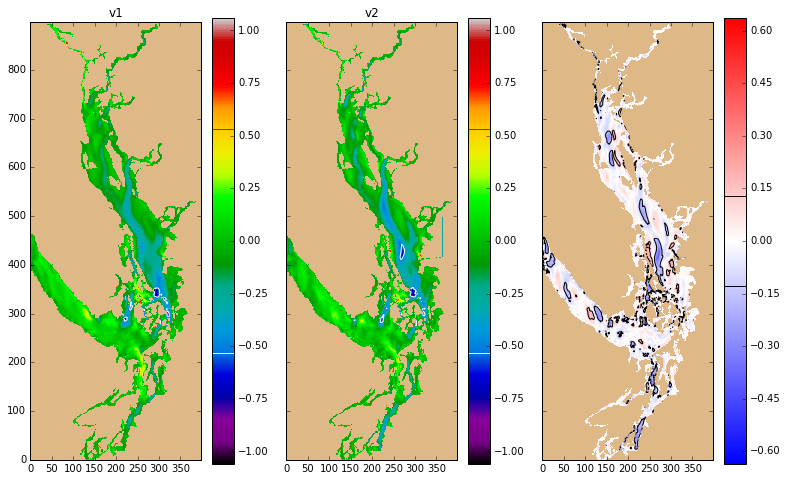

In [73]:
level = 0
fig, axs = plt.subplots(1, 3, figsize=(13,8), sharey=True)
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
nicecolours = ('white','red')  # these tend to emphasize little patches of high velocities
vmax1 = np.max(vvel1_masked[level])
vmax2 = np.max(vvel2_masked[level])
vmin1 = np.min(vvel1_masked[level])
vmin2 = np.min(vvel2_masked[level])
vmax = max(vmax1,vmax2,-vmin1,-vmin2)
vs = (-vmax/2.,vmax/2.)
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(vvel1_masked[level],cmap=cmap,vmax=vmax,vmin=-vmax)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
CS=axs[0].contour(vvel1_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(vvel2_masked[level],cmap=cmap,vmax=vmax,vmin=-vmax)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
CS=axs[1].contour(vvel2_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# third one
cmap = plt.get_cmap('bwr')
cmap.set_bad('burlywood')
viz_tools.set_aspect(axs[2])
vmax = np.max(vvel2_masked[level]-vvel1_masked[level])
vmin = np.min(vvel2_masked[level]-vvel1_masked[level])
vmax = max(vmax,-vmin)
mesh = axs[2].pcolormesh(vvel2_masked[level]-vvel1_masked[level],cmap=cmap,vmax=vmax,vmin=-vmax)
cbar=fig.colorbar(mesh, ax=axs[2])
CS=axs[2].contour(vvel2_masked[level]-vvel1_masked[level],(-0.2*vmax,0.2*vmax), 
                  colors=('black','black'))
cbar.add_lines(CS)
print (depth[level])

0.5


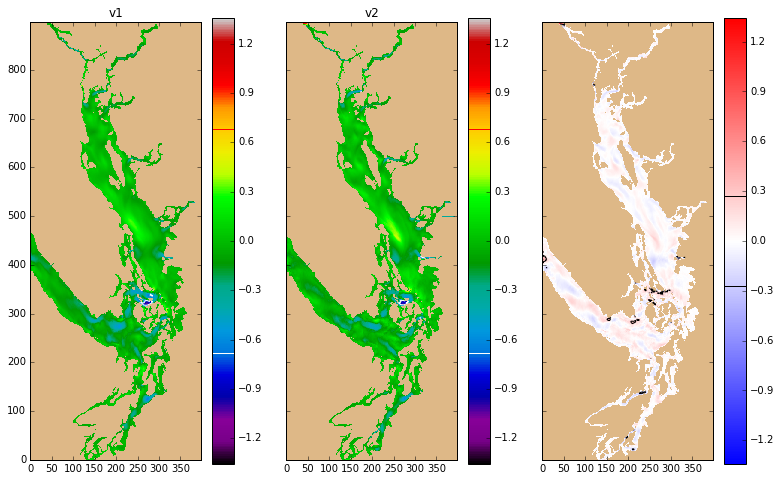

In [74]:
level = 0
fig, axs = plt.subplots(1, 3, figsize=(13,8), sharey=True)
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
nicecolours = ('white','red')  # these tend to emphasize little patches of high velocities
vmax1 = np.max(uvel1_masked[level])
vmax2 = np.max(uvel2_masked[level])
vmin1 = np.min(uvel1_masked[level])
vmin2 = np.min(uvel2_masked[level])
vmax = max(vmax1,vmax2,-vmin1,-vmin2)
vs = (-vmax/2.,vmax/2.)
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(uvel1_masked[level],cmap=cmap,vmax=vmax,vmin=-vmax)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
CS=axs[0].contour(uvel1_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(uvel2_masked[level],cmap=cmap,vmax=vmax,vmin=-vmax)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
CS=axs[1].contour(uvel2_masked[level],vs, colors=nicecolours)
cbar.add_lines(CS)
# third one
cmap = plt.get_cmap('bwr')
cmap.set_bad('burlywood')
viz_tools.set_aspect(axs[2])
vmax = np.max(uvel2_masked[level]-uvel1_masked[level])
vmin = np.min(uvel2_masked[level]-uvel1_masked[level])
vmax = max(vmax,-vmin)
mesh = axs[2].pcolormesh(uvel2_masked[level]-uvel1_masked[level],cmap=cmap,vmax=vmax,vmin=-vmax)
cbar=fig.colorbar(mesh, ax=axs[2])
CS=axs[2].contour(uvel2_masked[level]-uvel1_masked[level],(-0.2*vmax,0.2*vmax), 
                  colors=('black','black'))
cbar.add_lines(CS)
print (depth[level])

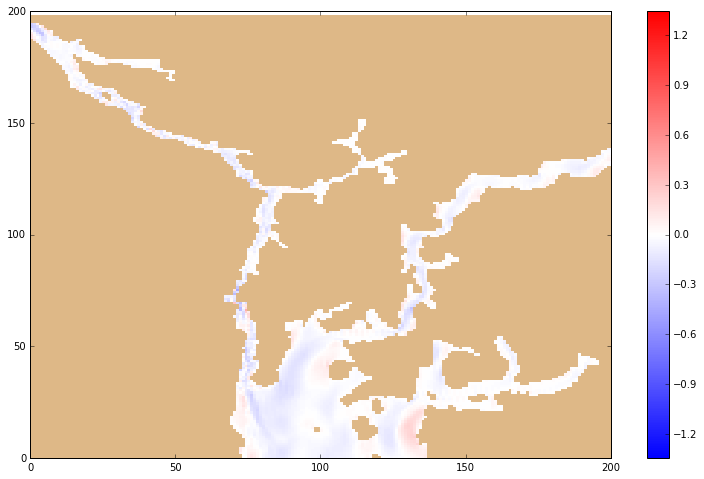

In [75]:
level = 0
fig, ax = plt.subplots(figsize=(13,8))
mesh = ax.pcolormesh(vvel2_masked[level,700:,50:250]-vvel1_masked[level,700:,50:250],cmap=cmap,vmax=vmax,vmin=-vmax)
cbar=fig.colorbar(mesh, ax=ax)

0.5


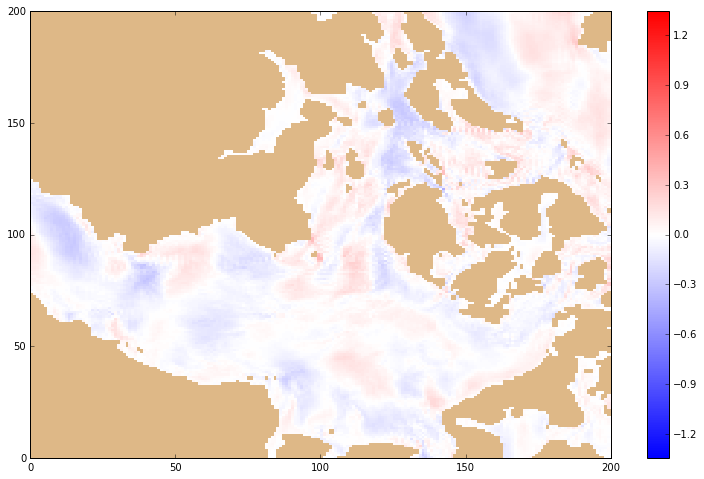

In [76]:
level = 0
fig, ax = plt.subplots(figsize=(13,8))
mesh = ax.pcolormesh(vvel2_masked[level,200:400,120:320]-vvel1_masked[level,200:400,120:320],cmap=cmap,vmax=vmax,vmin=-vmax)
cbar=fig.colorbar(mesh, ax=ax)
print (depth[level])

0.5


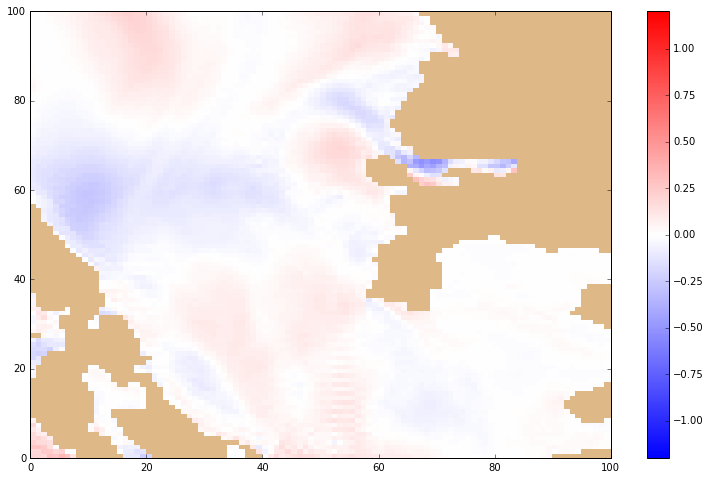

In [77]:
level = 0
fig, ax = plt.subplots(figsize=(13,8))
mesh = ax.pcolormesh(uvel2_masked[level,350:450,250:350]
                     -uvel1_masked[level,350:450,250:350]
                     ,cmap=cmap,vmax=1.2,vmin=-1.2)
cbar=fig.colorbar(mesh, ax=ax)
print (depth[level])

0.5


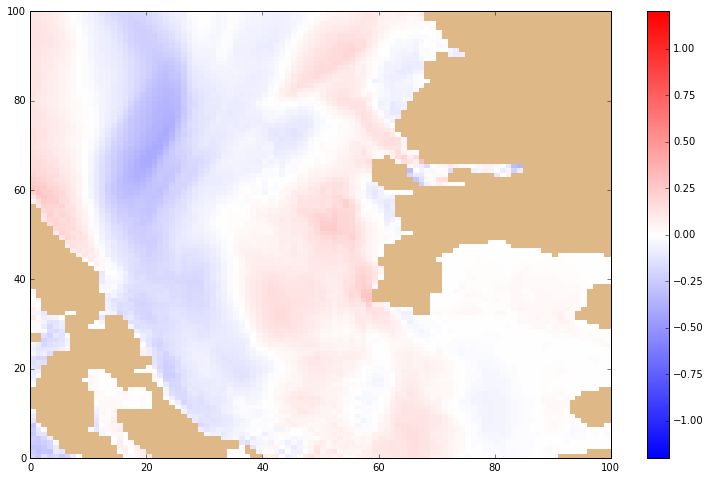

In [78]:
level = 0
fig, ax = plt.subplots(figsize=(13,8))
mesh = ax.pcolormesh(vvel2_masked[level,350:450,250:350]-vvel1_masked[level,350:450,250:350],
                     cmap=cmap,vmax=1.2,vmin=-1.2)
cbar=fig.colorbar(mesh, ax=ax)
print (depth[level])

#### Surface Height Near the Mouth of Juan de Fuca

This is used to check for smoothness in this boundary condition region

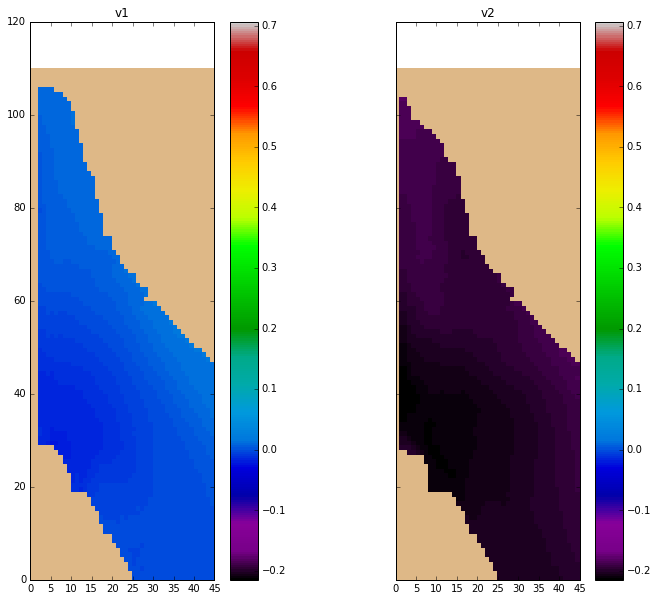

In [79]:
fig, axs = plt.subplots(1, 2, figsize=(12,10), sharey=True)
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
vmax1 = np.max(eta1_masked)
vmax2 = np.max(eta2_masked)
vmin1 = np.min(eta1_masked)
vmin2 = np.min(eta2_masked)
vmax = max(vmax1,vmax2)
vmin = min(vmin1,vmin2)
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(eta1_masked[360:470,:45],cmap=cmap,vmax=vmax,vmin=vmin)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(eta2_masked[360:470,:45],cmap=cmap,vmax=vmax,vmin=vmin)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
# third one
#viz_tools.set_aspect(axs[2])
#vmax = np.max(eta2_masked[360:470,:45]-eta1_masked[360:470,:45])
#vmin = np.min(eta2_masked[360:470,:45]-eta1_masked[360:470,:45])
#mesh = axs[2].pcolormesh(eta2_masked[360:470,:45]-eta1_masked[360:470,:45]
#                         ,cmap=cmap,vmax=vmax,vmin=vmin)
#cbar=fig.colorbar(mesh, ax=axs[2])


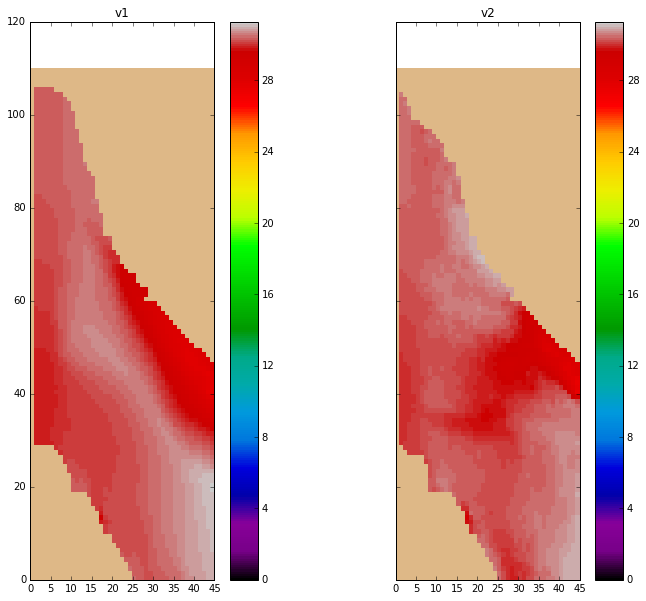

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(12,10), sharey=True)
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
vmax1 = np.max(sal1_masked[0])
vmax2 = np.max(sal2_masked[0])
vmin1 = np.min(sal1_masked[0])
vmin2 = np.min(sal2_masked[0])
vmax = max(vmax1,vmax2)
vmin = min(vmin1,vmin2)
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(sal1_masked[0,360:470,:45],cmap=cmap,vmax=vmax,vmin=vmin)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(sal2_masked[0,360:470,:45],cmap=cmap,vmax=vmax,vmin=vmin)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])

#### In-out Flow from the mouth of Juan de Fuca at 15 m

This is to look at the outflow (should be focussed on the north-side) and inflow (expected, but not actually) weaker at this depth.  Outflow is smoother and better positioned after we corrected barotropic velocity.
                                                                

15.6343


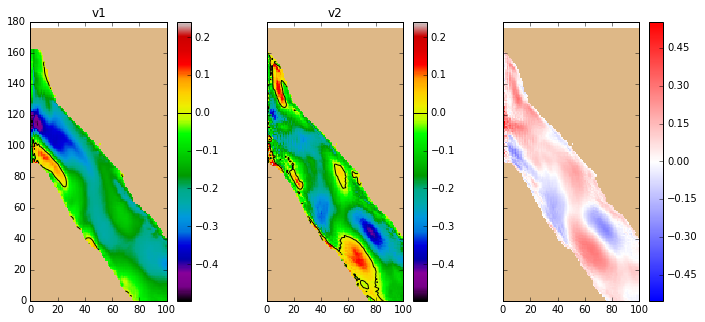

In [81]:
level = 15; print (depth[level])
im = 300; ix=476; jx = 100
fig, axs = plt.subplots(1, 3, figsize=(12,5), sharey=True)
cmap = plt.get_cmap('spectral')
cmap.set_bad('burlywood')
array1 = uvel1_masked[level,im:ix,:jx]-vvel1_masked[level,im:ix,:jx]
array2 = uvel2_masked[level,im:ix,:jx]-vvel2_masked[level,im:ix,:jx]
vmax1 = np.max(array1)
vmax2 = np.max(array2)
vmin1 = np.min(array1)
vmin2 = np.min(array2)
vmax = max(vmax1,vmax2)
vmin = min(vmin1,vmin2)
# first one
viz_tools.set_aspect(axs[0])
mesh = axs[0].pcolormesh(array1,cmap=cmap,vmax=vmax,vmin=vmin)
axs[0].set_title(date1)
cbar=fig.colorbar(mesh, ax=axs[0])
CS=axs[0].contour(array1,0, colors=('black'))
cbar.add_lines(CS)
# second one
viz_tools.set_aspect(axs[1])
mesh = axs[1].pcolormesh(array2,cmap=cmap,vmax=vmax,vmin=vmin)
axs[1].set_title(date2)
cbar=fig.colorbar(mesh, ax=axs[1])
CS=axs[1].contour(array2,0, colors=('black'))
cbar.add_lines(CS)
# third one
cmap = plt.get_cmap('bwr')
cmap.set_bad('burlywood')
viz_tools.set_aspect(axs[2])
vmax = np.max(array2-array1)
vmin = np.min(array2-array1)
vmax = max(vmax,-vmin)
mesh = axs[2].pcolormesh(array2-array1,cmap=cmap,vmax=vmax,vmin=-vmax)
cbar=fig.colorbar(mesh, ax=axs[2])


#### Vertical Cross-section of 'East' Velocity running away from Boundary

Not as helpful as I had hoped......

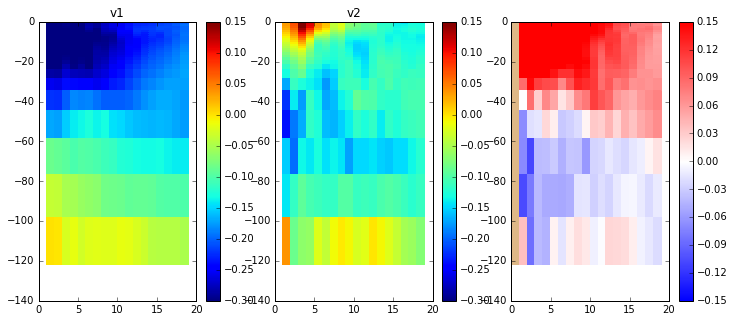

In [82]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(0,20),-depth[:28],uvel1_masked[:28,415,0:20],vmax=0.15,vmin=-0.3)
plt.title(date1)
plt.colorbar()
#CS=pylab.contour(np.arange(0,20),-depth[:28],uvel1_masked[:28,415,0:20],(0), colors='black')
plt.subplot(1,3,2)
plt.pcolormesh(np.arange(0,20),-depth[:28],uvel2_masked[:28,415,0:20],vmax=0.15,vmin=-0.3)
plt.title(date2)
plt.colorbar()
#CS=pylab.contour(np.arange(0,20),-depth[:28],uvel2_masked[:28,415,0:20],(0), colors='black')
plt.subplot(1,3,3)
plt.pcolormesh(np.arange(0,20),-depth[:28],uvel2_masked[:28,415,0:20]-
               uvel1_masked[:28,415,0:20],cmap=plt.cm.bwr,vmax=0.15,vmin=-0.15)
plt.colorbar()

#### 'East' Velocity Vertical Cross-section, across the mouth, a bit to the east of the Boundary Forcing

Very clear picture of the estuarine flow in JdF.  Shows freshwater coming in from the ocean in the winter of 2002/2003!  Printed values are the flux through the cross-section.  Negative is inward

9689.76183241 9175.72481981
0.426556


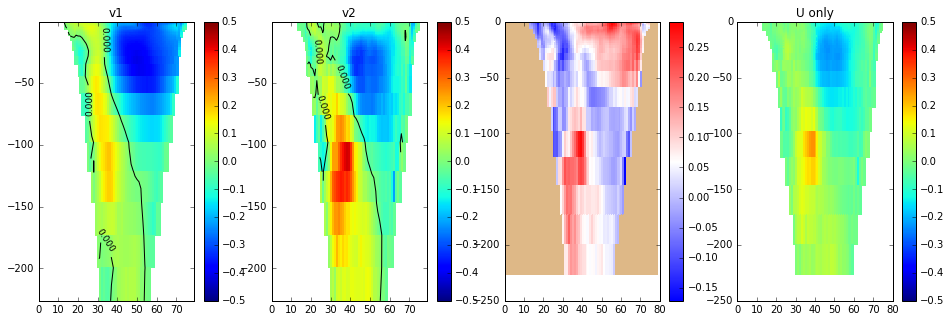

In [83]:
flux1 = np.zeros((40,898))
flux2 = np.zeros((40,898))
ipos = 20
j1 = 355; j2 = 435
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.pcolormesh(np.arange(0,80),-depth[:32],uvel1_masked[:32,j1:j2,ipos]-
               vvel1_masked[:32,j1:j2,ipos],vmin=-0.5, vmax=0.5)
plt.title(date1)
plt.colorbar()
CS=pylab.contour(np.arange(0,80),-depth[:32],uvel1_masked[:32,j1:j2,ipos]-
                 vvel1_masked[:32,j1:j2,ipos],(0), colors='black')
pylab.clabel(CS, fontsize=9, inline=1)
for i in range(j1,j2):
    flux1[:32,i] = deldepth[:32]*uvel1_masked[:32,i,ipos]
    flux2[:32,i] = deldepth[:32]*uvel2_masked[:32,i,ipos]
print (flux1[:32,j1:j2].sum(), flux2[:32,j1:j2].sum())
plt.subplot(1,4,2)
plt.pcolormesh(np.arange(0,80),-depth[:32],uvel2_masked[:32,j1:j2,ipos]
               -vvel2_masked[:32,j1:j2,ipos], vmin=-0.5, vmax=0.5)
plt.title(date2)
plt.colorbar()
CS=pylab.contour(np.arange(0,80),-depth[:32],uvel2_masked[:32,j1:j2,ipos]-
                 vvel2_masked[:32,j1:j2,ipos],(0), colors='black')
pylab.clabel(CS, fontsize=9, inline=1)
plt.subplot(1,4,3)
plt.pcolormesh(np.arange(0,80),-depth[:32],uvel2_masked[:32,j1:j2,ipos]-
               vvel2_masked[:32,j1:j2,ipos]+vvel1_masked[:32,j1:j2,ipos]-
               uvel1_masked[:32,j1:j2,ipos],cmap=plt.cm.bwr)
plt.colorbar()
plt.subplot(1,4,4)
plt.pcolormesh(np.arange(80),-depth[:32],uvel2_masked[:32,j1:j2,ipos],vmin = -0.5, vmax =0.5)
plt.title("U only")
plt.colorbar()
#CS=pylab.contour(np.arange(80),-depth[:32],uvel2_masked[:32,j1:j2,ipos],(0), colors='black')
#pylab.clabel(CS, fontsize=9, inline=1)
print (np.max(uvel2_masked[:32,j1:j2,ipos]-
                 vvel2_masked[:32,j1:j2,ipos]))

#### Salinity for the Same Cross-section

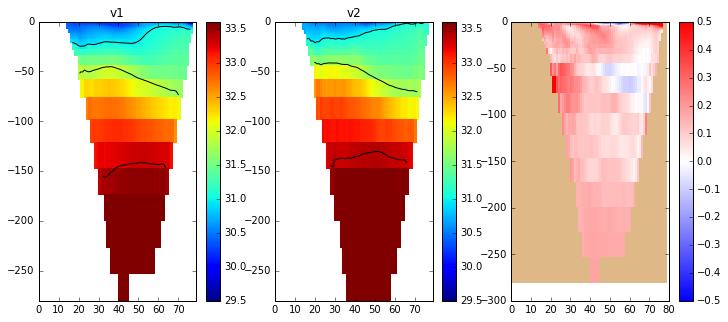

In [84]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(0,80),-depth[:34],sal1_masked[:34,350:430,23],vmax=33.6,vmin=29.5)
plt.title(date1)
plt.colorbar()
CS=pylab.contour(np.arange(0,80),-depth[:34],sal1_masked[:34,350:430,23],(31,32,33.5), colors='black')
plt.subplot(1,3,2)
plt.pcolormesh(np.arange(0,80),-depth[:34],sal2_masked[:34,350:430,23],vmax=33.6,vmin=29.5)
plt.title(date2)
plt.colorbar()
CS=pylab.contour(np.arange(0,80),-depth[:34],sal2_masked[:34,350:430,23],(31,32,33.5), colors='black')
plt.subplot(1,3,3)
plt.pcolormesh(np.arange(0,80),-depth[:34],sal2_masked[:34,350:430,23]-
               sal1_masked[:34,350:430,23],cmap=plt.cm.bwr,vmax=0.5,vmin=-0.5)
plt.colorbar()

#### Maximum Velocities, Maximum Salinity

Tells you which day had stronger tides and whether salinity is increasing or decreasing in JdF

In [85]:
print (np.max(vvel1_masked), np.max(vvel2_masked), np.min(vvel1_masked), np.min(vvel2_masked))

0.770838 0.676908 -1.06033 -0.970456


In [86]:
print (np.max(uvel1_masked), np.max(uvel2_masked), np.min(uvel1_masked), np.min(uvel2_masked))

0.67455 1.12499 -1.05461 -1.35791


In [87]:
print (np.max(sal1_masked), np.max(sal2_masked), np.min(sal1_masked), np.min(sal2_masked))

33.7763 33.9372 1.17408e-33 5.28467e-38


In [88]:
print (np.max(temp1_masked), np.max(temp2_masked), np.min(temp1_masked), np.min(temp2_masked))

13.2365 11.9305 5.83996 5.29493


#### Difference in Salinity in Southern Region at 122 m

Tells you if deep water is mixing (blue) or stratifying (red) between the two time periods.  Blue: usually spring tides, Red: usually neap tides

173.114
0.763065


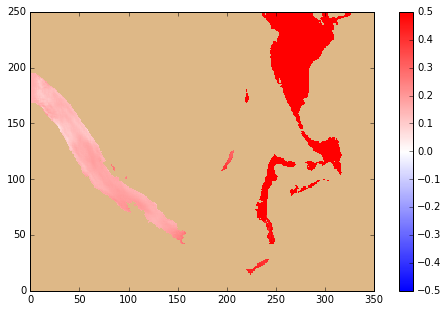

In [89]:
level = 29; print (depth[level])
im = 230; ix=480; jx = 350
fig, axs = plt.subplots(1, 1, figsize=(9,5))
cmap = plt.get_cmap('bwr')
cmap.set_bad('burlywood')
array1 = sal2_masked[level,im:ix,:jx]-sal1_masked[level,im:ix,:jx]

viz_tools.set_aspect(axs)
#vmax = np.max(array1)
#vmin = np.min(array1)
#vmax = max(vmax,-vmin)
vmax = 0.5; vmin = -0.5
mesh = axs.pcolormesh(array1,cmap=cmap,vmax=vmax,vmin=-vmax)
iv = 113
jv = 283
#axs.plot(jv,iv,'o')
cbar=fig.colorbar(mesh, ax=axs)
print (sal2_masked[level,iv+im,jv]-sal1_masked[level,iv+im,jv])

#### Thalweg Plots: Time 1, Time 2 and Difference

[406 406 406 406 405] [2 3 4 5 5]
(40, 1540) (40, 1540) (40, 1540)


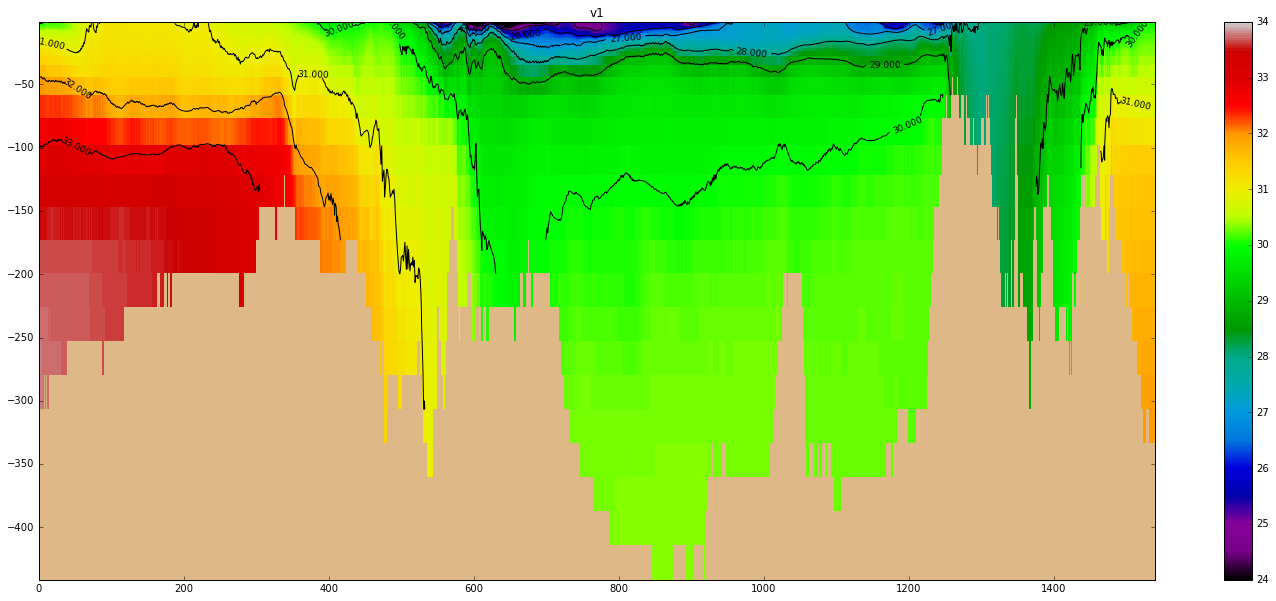

In [90]:
d=40
T_lat = fT1.variables['nav_lat'][:]
T_lon = fT1.variables['nav_lon'][:]
smin = 24.; smax = 34; dels=-1

lines = np.loadtxt('../../../Tools/bathymetry/thalweg_working.txt', delimiter=" ", dtype='int')

print (lines[:5, 0], lines[:5, 1])

thalweg_lon = T_lon[lines[:5, 0], lines[:5, 1]]
thalweg_lat = T_lat[lines[:5, 0], lines[:5, 1]]

ds=np.arange(0,lines.shape[0],1);

vs=np.arange(smax,smin,dels);

salT=sal1_masked[:,lines[:,0],lines[:,1]]
XX,ZZ = np.meshgrid(ds,-depth[:d])
print (salT.shape, XX.shape, ZZ.shape)

plt.figure(figsize=(25,10))
pylab.pcolormesh(XX,ZZ,salT[:d],vmin=smin,vmax=smax,cmap='spectral')
pylab.colorbar()
CS=pylab.contour(XX,ZZ,salT[:d],vs, colors='black')
pylab.clabel(CS, fontsize=9, inline=1)
pylab.title(date1)

(40, 1540) (40, 1540) (40, 1540)


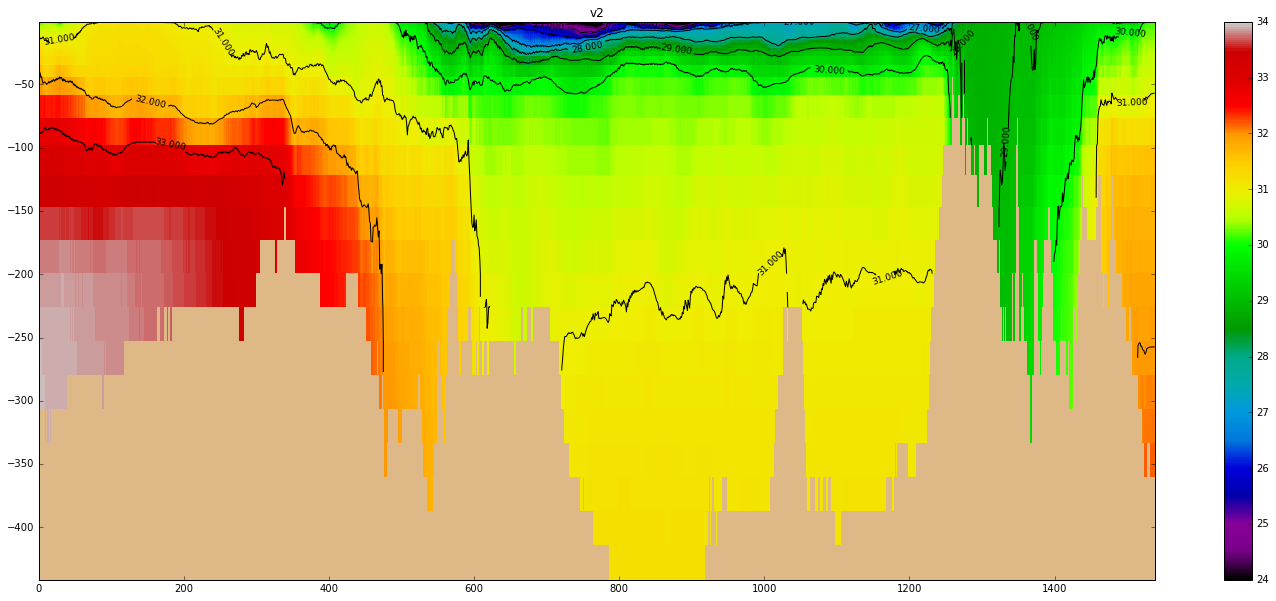

In [91]:
d=40
T_lat = fT1.variables['nav_lat'][:]
T_lon = fT1.variables['nav_lon'][:]


lines = np.loadtxt('../../../Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False, dtype=int)

thalweg_lon = T_lon[lines[:,0],lines[:,1]]
thalweg_lat = T_lat[lines[:,0],lines[:,1]]

ds=np.arange(0,lines.shape[0],1);

vs=np.arange(smax,smin,dels);
salT=sal2_masked[:,lines[:,0],lines[:,1]]
XX,ZZ = np.meshgrid(ds,-depth[:d])
print (salT.shape, XX.shape, ZZ.shape)

xlow = 0; xhi = 1539;
plt.figure(figsize=(25,10))
pylab.pcolormesh(XX[:,xlow:xhi],ZZ[:,xlow:xhi],salT[:d,xlow:xhi],vmin=smin,vmax=smax,cmap='spectral')
pylab.colorbar()
CS=pylab.contour(XX[:,xlow:xhi],ZZ[:,xlow:xhi],salT[:d,xlow:xhi],vs, colors='black')
pylab.clabel(CS, fontsize=9, inline=1)
pylab.title(date2)

(40, 1540) (40, 1540) (40, 1540)
2.78815 -2.97628
-0.317009


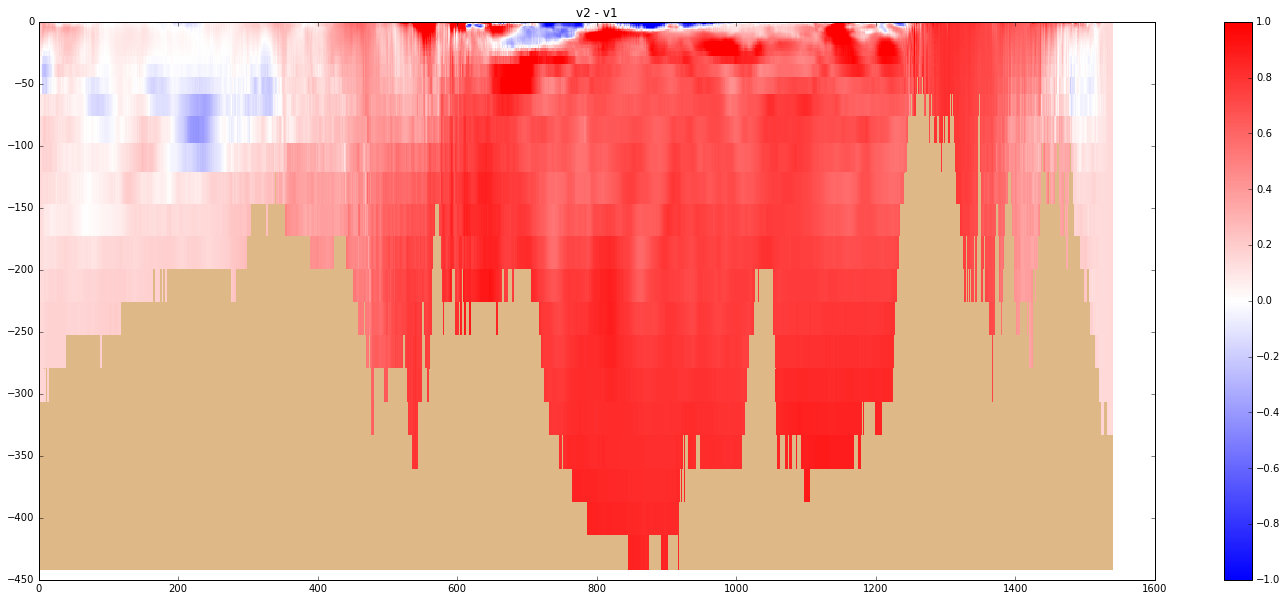

In [92]:
d=40

smin=-1; smax=1; dels=-0.2




vs=np.arange(smax,smin,dels);

salT=sal2_masked[:,lines[:,0],lines[:,1]]-sal1_masked[:,lines[:,0],lines[:,1]]
XX,ZZ = np.meshgrid(ds,-depth[:d])
print (salT.shape, XX.shape, ZZ.shape)
print (np.max(salT), np.min(salT))
print (np.min(salT[:,800:820]))

plt.figure(figsize=(25,10))
pylab.pcolormesh(XX,ZZ,salT[:d],vmin=smin,vmax=smax,cmap=plt.cm.bwr)
pylab.colorbar()
#CS=pylab.contour(XX,ZZ,salT[:d],vs, colors='black')
#pylab.clabel(CS, fontsize=9, inline=1)
pylab.title(date2+' - '+date1)

#### Plots in Island Region

"East" velocity generally has 2-grid point noise, but ssh should not unless we are unstable.

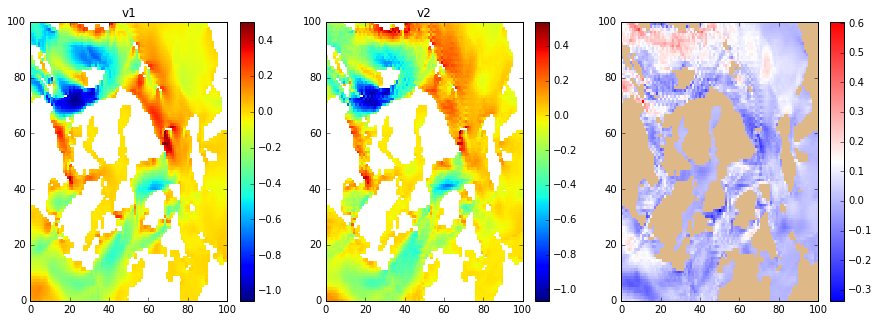

In [93]:
jmin=250; jmax=350; imin=250; imax=350
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pcolormesh(uvel1_masked[0,jmin:jmax,imin:imax])
plt.title(date1)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(uvel2_masked[0,jmin:jmax,imin:imax])
plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(uvel2_masked[0,jmin:jmax,imin:imax]-uvel1_masked[0,jmin:jmax,imin:imax]
               ,cmap=plt.cm.bwr)
plt.colorbar()

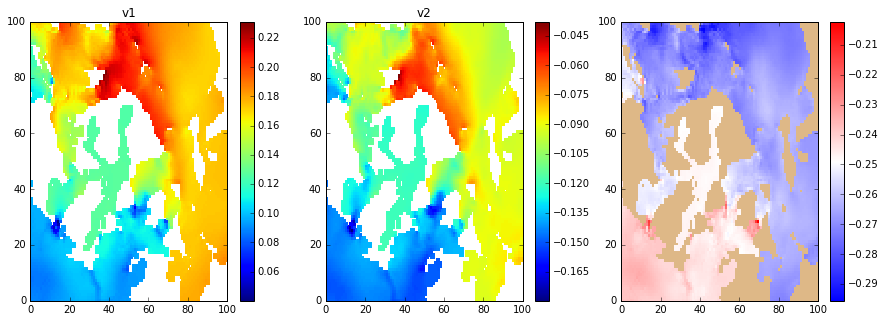

In [94]:
jmin=250; jmax=350; imin=250; imax=350
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pcolormesh(eta1_masked[jmin:jmax,imin:imax])
plt.title(date1)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(eta2_masked[jmin:jmax,imin:imax])
plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(eta2_masked[jmin:jmax,imin:imax]-eta1_masked[jmin:jmax,imin:imax]
               ,cmap=plt.cm.bwr)
plt.colorbar()

121.867


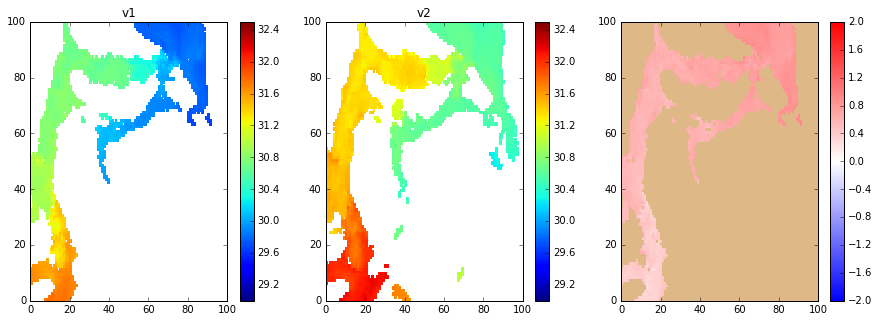

In [95]:
level = 27; print (depth[level])
jmin=260; jmax=360; imin=230; imax=330
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pcolormesh(sal1_masked[level,jmin:jmax,imin:imax],vmax=32.5,vmin=29)
plt.title(date1)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(sal2_masked[level,jmin:jmax,imin:imax],vmax=32.5,vmin=29)
plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(sal2_masked[level,jmin:jmax,imin:imax]-sal1_masked[level,jmin:jmax,imin:imax]
               ,cmap=plt.cm.bwr,vmax=2,vmin=-2)
plt.colorbar()

#### Vertical Velocity

In [96]:
fW1 = NC.Dataset(resultsloc1+name1+'W.nc','r')
wvel1 = fW1.variables['vovecrtz'][time1,:]
mw = wvel1 == 0
wvel1_masked = np.ma.array(wvel1,mask=mw)
print (time1)
fW2 = NC.Dataset(resultsloc2+name2+'W.nc','r')
wvel2 = fW2.variables['vovecrtz'][time2,:]
mw = wvel2 == 0
wvel2_masked = np.ma.array(wvel2,mask=mw)
print (wvel2.shape, time2)

0
(40, 898, 398) 0


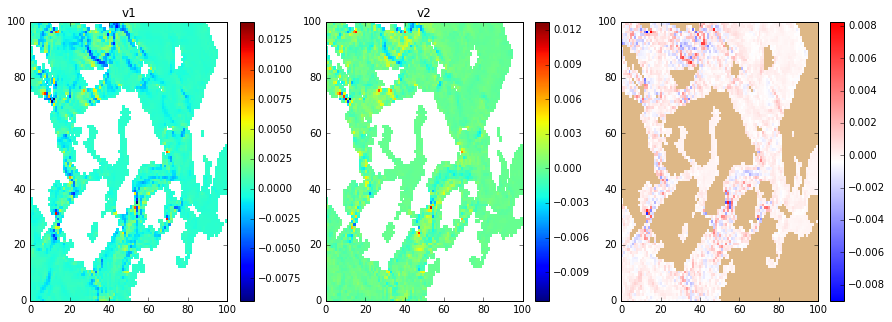

In [97]:
level = 15
jmin=250; jmax=350; imin=250; imax=350
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pcolormesh(wvel1_masked[level,jmin:jmax,imin:imax])
plt.title(date1)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(wvel2_masked[level,jmin:jmax,imin:imax])
plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(wvel2_masked[level,jmin:jmax,imin:imax]-wvel1_masked[level,jmin:jmax,imin:imax]
               ,cmap=plt.cm.bwr)
plt.colorbar()

#### "Rich's Current" -- Cross-sections through VENUS Stations

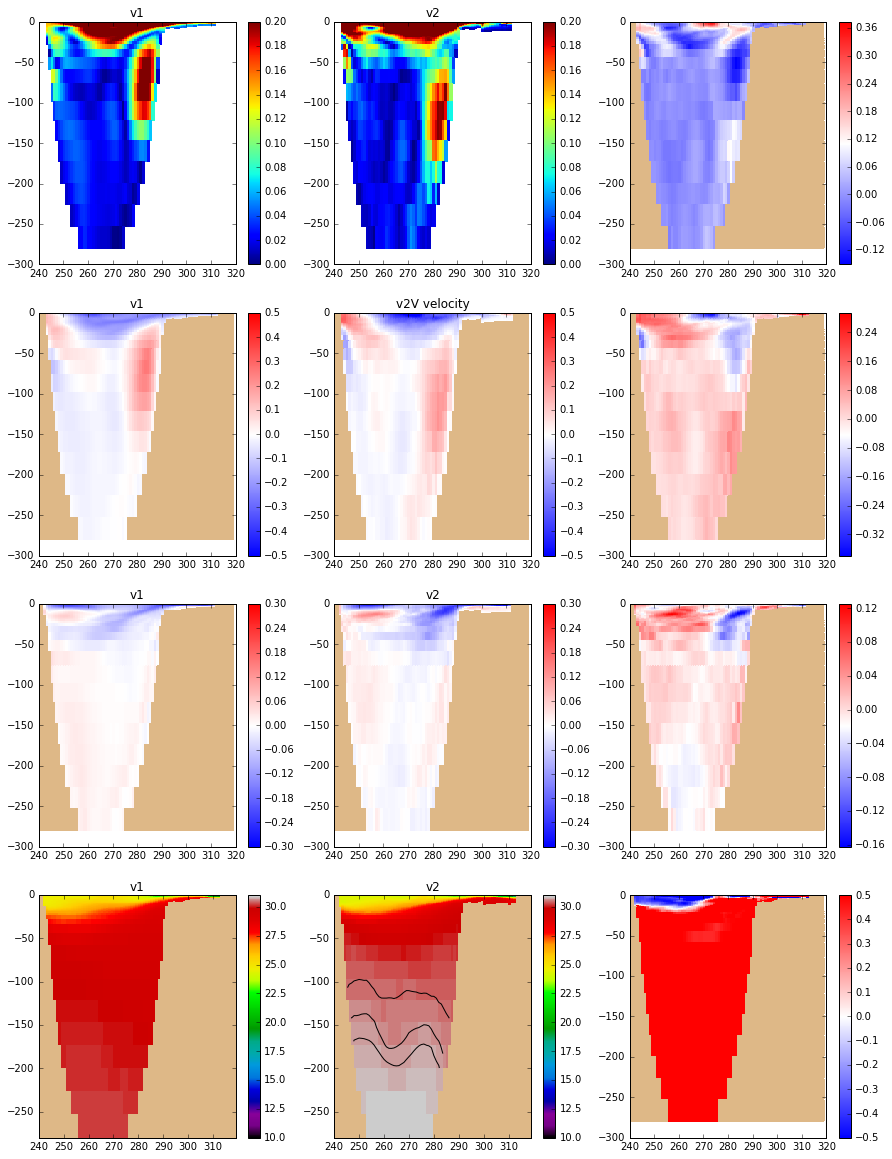

In [98]:
jval = 424; imin=240; imax=320; id=34
plt.figure(figsize=(15,20))
plt.subplot(4,3,1)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],np.sqrt(vvel1_masked[:id,jval,imin:imax]**2
                                                 +uvel1_masked[:id,jval,imin:imax]**2),vmax=0.2,vmin=0.)
plt.title(date1)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

plt.subplot(4,3,2)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],np.sqrt(vvel2_masked[:id,jval,imin:imax]**2
                                                 +uvel2_masked[:id,jval,imin:imax]**2),vmax=0.2,vmin=0.)
plt.title(date2)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

plt.subplot(4,3,3)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],np.sqrt(vvel2_masked[:id,jval,imin:imax]**2
                                                 +uvel2_masked[:id,jval,imin:imax]**2)
                                                 -np.sqrt(vvel1_masked[:id,jval,imin:imax]**2
                                                 +uvel1_masked[:id,jval,imin:imax]**2),cmap=plt.cm.bwr)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()
# northsouth velocity only
plt.subplot(4,3,4)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel1_masked[:id,jval,imin:imax], 
               vmax=0.5, vmin=-0.5, cmap=plt.cm.bwr)
plt.title(date1)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

plt.subplot(4,3,5)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel2_masked[:id,jval,imin:imax],
              vmax=0.5, vmin=-0.5, cmap=plt.cm.bwr)
plt.title(date2+'V velocity')
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

plt.subplot(4,3,6)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel2_masked[:id,jval,imin:imax]
                                                 -vvel1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

# EAST-WEST velocity only
plt.subplot(4,3,7)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],uvel1_masked[:id,jval,imin:imax], 
               vmax = 0.3, vmin=-0.3, cmap=plt.cm.bwr)
plt.title(date1)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

plt.subplot(4,3,8)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],uvel2_masked[:id,jval,imin:imax], 
               vmax = 0.3, vmin=-0.3, cmap=plt.cm.bwr)
plt.title(date2)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

plt.subplot(4,3,9)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],uvel2_masked[:id,jval,imin:imax]
                                                 -uvel1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

# salinity
plt.subplot(4,3,10)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],sal1_masked[:id,jval,imin:imax],
               vmax = 31, vmin = 10, cmap=plt.cm.spectral)
plt.colorbar()
CS=pylab.contour(np.arange(imin,imax),-depth[:id],sal1_masked[:id,jval,imin:imax],(30.5,30.7,30.8), colors='black')
plt.title(date1)
#plt.plot(282,-170,'*',267,-300,'*')

plt.subplot(4,3,11)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],sal2_masked[:id,jval,imin:imax],
               vmax = 31, vmin = 10, cmap=plt.cm.spectral)
plt.colorbar()
CS=pylab.contour(np.arange(imin,imax),-depth[:id],sal2_masked[:id,jval,imin:imax],(30.5,30.7,30.8), colors='black')
plt.title(date2)
#plt.plot(282,-170,'*',267,-300,'*')


plt.subplot(4,3,12)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],sal2_masked[:id,jval,imin:imax]
                                                 -sal1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr,
                                                 vmax=0.5,vmin=-0.5)
#plt.plot(282,-170,'*',267,-300,'*')
plt.colorbar()

147.089


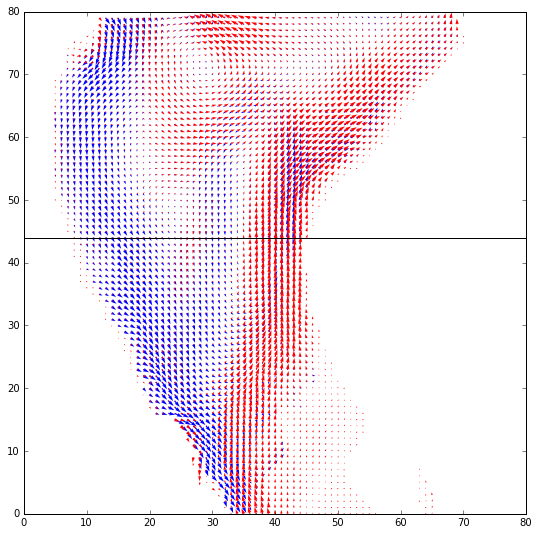

In [99]:
plt.figure(figsize=(9,9))
level = 28
print (depth[level])
jmin = 240
jmax = 320     
imin = 420-40 
imax = 420+40
plt.plot([0,jmax-jmin],[424-imin,424-imin],'k-')
plt.quiver(0.5*uvel1_masked[level,imin:imax,jmin:jmax]+0.5*uvel1_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel1_masked[level,imin:imax,jmin:jmax]+0.5*vvel1_masked[level,imin-1:imax-1,jmin:jmax],color='b')
plt.quiver(0.5*uvel2_masked[level,imin:imax,jmin:jmax]+0.5*uvel2_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel2_masked[level,imin:imax,jmin:jmax]+0.5*vvel2_masked[level,imin-1:imax-1,jmin:jmax],color='r')

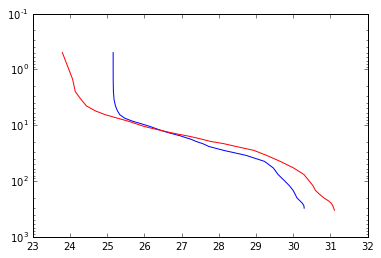

In [100]:
id=40
plt.semilogy(sal1_masked[:id,424,267],depth[:id],'b',sal2_masked[:id,424,267],depth[:id],'r')
plt.gca().invert_yaxis()

#### Northern Boundary

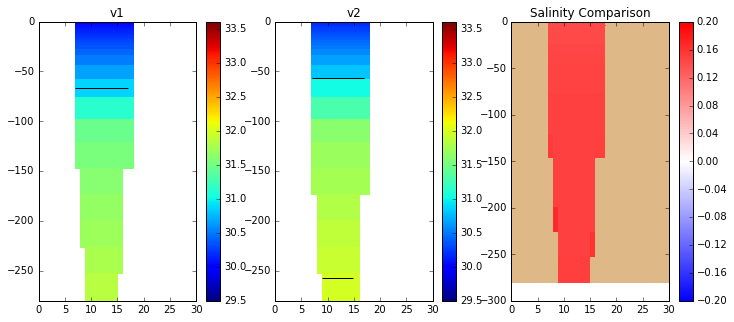

In [101]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
jpos = 896
plt.pcolormesh(np.arange(0,31),-depth[:34],sal1_masked[:34,jpos,32:63],vmax=33.6,vmin=29.5)
plt.title(date1)
plt.colorbar()
CS=pylab.contour(np.arange(0,31),-depth[:34],sal1_masked[:34,jpos,32:63],(31,32,33.5), colors='black')
plt.subplot(1,3,2)
plt.pcolormesh(np.arange(0,31),-depth[:34],sal2_masked[:34,jpos,32:63],vmax=33.6,vmin=29.5)
plt.title(date2)
plt.colorbar()
CS=pylab.contour(np.arange(0,31),-depth[:34],sal2_masked[:34,jpos,32:63],(31,32,33.5), colors='black')
plt.subplot(1,3,3)
plt.title("Salinity Comparison")
plt.pcolormesh(np.arange(0,31),-depth[:34],sal2_masked[:34,jpos,32:63]-
               sal1_masked[:34,jpos,32:63],cmap=plt.cm.bwr,vmax=0.2,vmin=-0.2)
plt.colorbar()

In [102]:
vbarotropic1 = np.average(vvel1_masked[:,879:898,32:63],axis=0)
print (vbarotropic1.shape)
vbaroclinic1 = vvel1_masked[:,879:898, 32:63]- vbarotropic1
print (vbaroclinic1.shape)
ubarotropic1 = np.average(uvel1_masked[:,879:898,32:63],axis=0)
ubaroclinic1 = uvel1_masked[:,879:898, 32:63]- ubarotropic1

(19, 31)
(40, 19, 31)


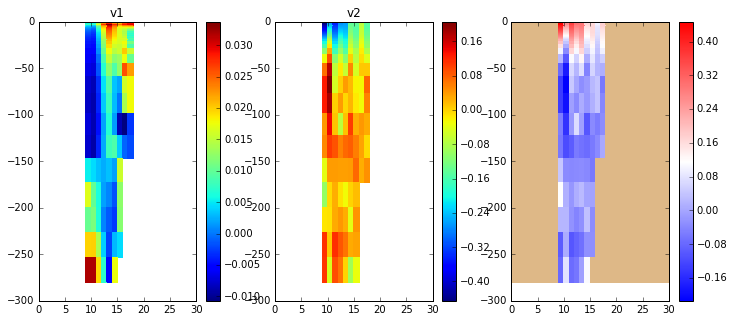

In [103]:
jpos = 895
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(0,31),-depth[:34],vvel1_masked[:34,jpos,32:63])
plt.title(date1)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(np.arange(0,31),-depth[:34],vvel2_masked[:34,jpos,32:63])
plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(np.arange(0,31),-depth[:34],vvel1_masked[:34,jpos,32:63]-
               vvel2_masked[:34,jpos,32:63],cmap=plt.cm.bwr)
plt.colorbar()

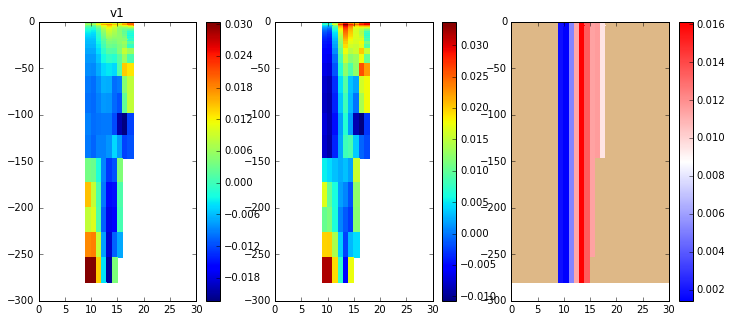

In [104]:
jpos = 895
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(0,31),-depth[:34],vbaroclinic1[:34,jpos-879])
plt.title(date1)
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(np.arange(0,31),-depth[:34],vvel1_masked[:34,jpos,32:63])
#plt.title(date2)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(np.arange(0,31),-depth[:34],vvel1_masked[:34,jpos,32:63]-
               vbaroclinic1[:34,jpos-879],cmap=plt.cm.bwr)
plt.colorbar()

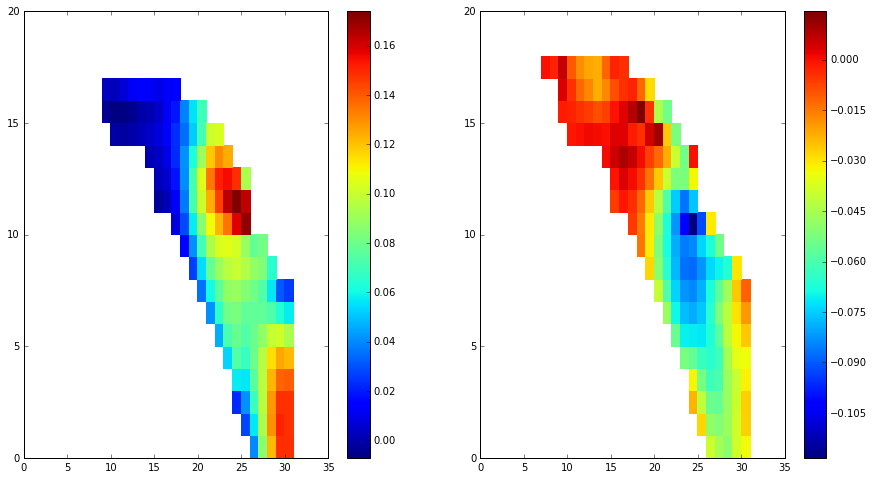

In [105]:
id = 4
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pcolormesh(vbaroclinic1[id])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(ubaroclinic1[id])
plt.colorbar()

(40, 19, 31)
(19,)


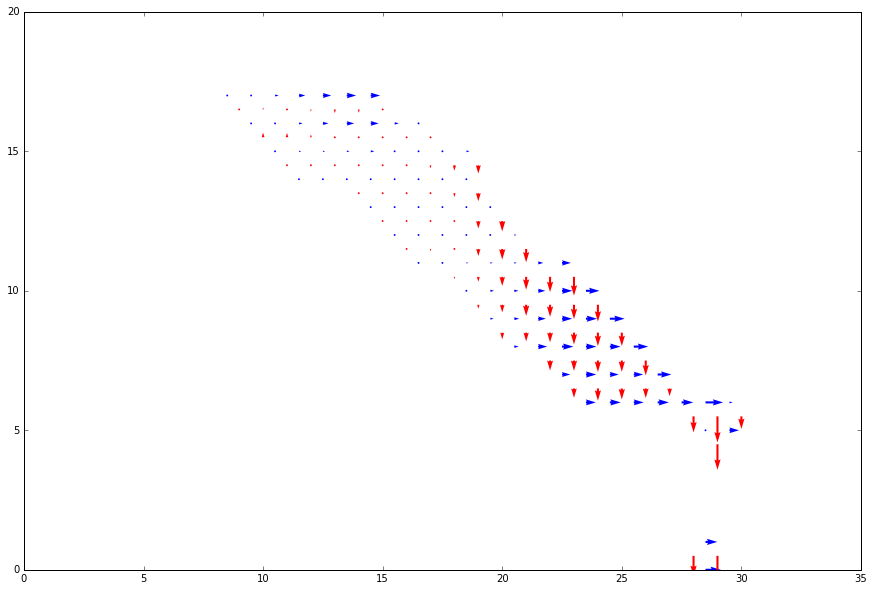

In [106]:
id = 30
print (ubaroclinic1.shape)
plt.figure(figsize=(15,10))
yr = np.arange(0,ubaroclinic1.shape[1])
print (yr.shape)
xr = np.arange(0+0.5,ubaroclinic1.shape[2]+0.5)
xrr, yrr = np.meshgrid(xr,yr)
plt.quiver(xrr, yrr, ubaroclinic1[id],np.zeros((ubaroclinic1.shape[1],ubaroclinic1.shape[2])),color='b', scale = 4)
yr = np.arange(0+0.5,vbaroclinic1.shape[1]+0.5)
xr = np.arange(0,vbaroclinic1.shape[2])
xrr, yrr = np.meshgrid(xr,yr)
plt.quiver(xrr, yrr, np.zeros((vbaroclinic1.shape[1],vbaroclinic1.shape[2])),vbaroclinic1[id],color='r', scale = 4)


[30.0040225982666 30.00758171081543 30.00754737854004 30.00749969482422 --] (898,)
[30.155656814575195 30.156574249267578 30.149879455566406
 30.141462326049805 --]
[-0.010230635292828083 -0.022084426134824753 -0.00010230539191979915 -- --]
[-0.3664645254611969 -0.251458078622818 -0.2640923261642456 -- --]
[0.022433100268244743 0.02218424156308174 0.022003257647156715 -- --]
[-0.11539338529109955 -0.1197870597243309 -0.12221171706914902
 -0.12221171706914902 --]
[-- -0.06130064278841019 -0.049829158931970596]
[-- 0.006148188374936581 0.1766088455915451]
[-- 29.844802856445312 29.845632553100586]
[-- 29.985532760620117 29.986919403076172]
[-- -0.01144107710570097 -0.14754484593868256]
[-- -0.11164863407611847 -0.33797648549079895]
[-- -- -0.015190395526587963]
[-- -0.21364103257656097 -0.21364103257656097]


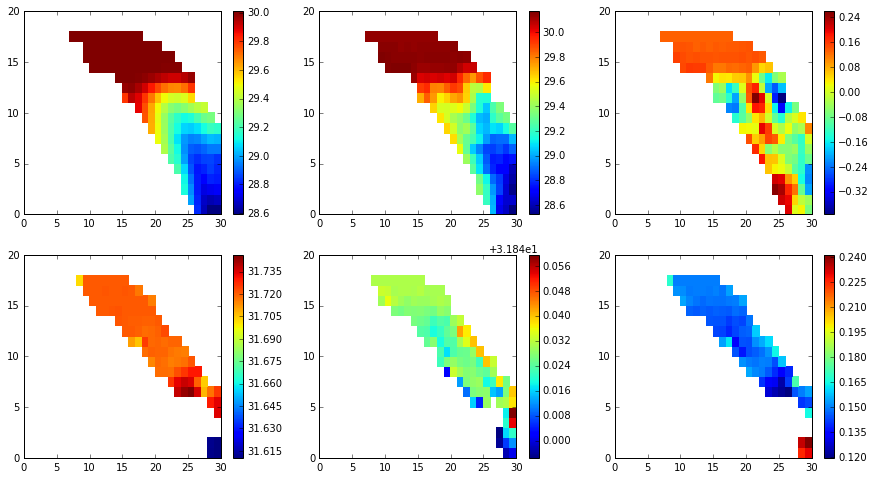

In [107]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.pcolormesh(sal1_masked[0,879:899,32:62])
plt.colorbar()
plt.subplot(2,3,4)
plt.pcolormesh(sal1_masked[30,879:898,32:62])
plt.colorbar()
plt.subplot(2,3,3)
plt.pcolormesh(sal2_masked[0,879:898,32:62]-sal1_masked[0,879:898,32:62])
plt.colorbar()
plt.subplot(2,3,2)
plt.pcolormesh(sal2_masked[0,879:899,32:62])
plt.colorbar()
plt.subplot(2,3,5)
plt.pcolormesh(sal2_masked[30,879:898,32:62])
plt.colorbar()
plt.subplot(2,3,6)
plt.pcolormesh(sal2_masked[30,879:898,32:62]-sal1_masked[30,879:898,32:62])
plt.colorbar()
print (sal1_masked[0, 893:,42], sal1[0,:,42].shape)
print (sal2_masked[0, 893:,42])
print (vvel1_masked[0, 893:,42])
print (vvel2_masked[0, 893:,42])
print (eta1_masked[893:,42])
print (eta2_masked[893:,42])
print (uvel1_masked[0, 400, :3])
print (uvel2_masked[0, 400, :3])
print (sal1_masked[0, 400, :3])
print (sal2_masked[0, 400, :3])
print (vvel1_masked[0, 400, :3])
print (vvel2_masked[0, 400, :3])
print (eta1_masked[400, :3])
print (eta2_masked[400, :3])

In [108]:
plt.figure(figsize=(9,9))
level = 0
jmin = 32
jmax = 62
imin = 879
imax = 898
plt.quiver(0.5*uvel1_masked[level,imin:imax,jmin:jmax]+0.5*uvel1_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel1_masked[level,imin:imax,jmin:jmax]+0.5*vvel1_masked[level,imin-1:imax-1,jmin:jmax],color='b')
plt.quiver(0.5*uvel2_masked[level,imin:imax,jmin:jmax]+0.5*uvel2_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel2_masked[level,imin:imax,jmin:jmax]+0.5*vvel2_masked[level,imin-1:imax-1,jmin:jmax],color='r')
print np.sqrt(uvel1_masked[level,893,49]**2+vvel1_masked[level,893,49]**2),np.sqrt(uvel2_masked[level,893,49]**2+vvel2_masked[level,893,49]**2)

SyntaxError: invalid syntax (<ipython-input-108-7b85d6d1eee7>, line 11)

In [ ]:
imax = 70
jmin = 880
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.pcolormesh(eta1_masked[jmin:898,32:imax])
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(eta2_masked[jmin:898,32:imax])
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(eta2_masked[jmin:898,32:imax]-eta1_masked[jmin:898,32:imax],cmap=plt.cm.bwr)
plt.colorbar()

#### Maximum Velocity Region

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.pcolormesh(vvel2_masked[0,730:896,30:150])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(vvel2_masked[0,730:896,30:150]-vvel1_masked[0,730:896,30:150])
plt.colorbar()

#### East Vancouver Island Current

In [ ]:
jval = 500; imin=210; imax=290; id=36
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],np.sqrt(vvel1_masked[:id,jval,imin:imax]**2
                                                 +uvel1_masked[:id,jval,imin:imax]**2),vmax=0.1,vmin=0.)
plt.title(date1)
plt.colorbar()

plt.subplot(2,3,2)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],np.sqrt(vvel2_masked[:id,jval,imin:imax]**2
                                                 +uvel2_masked[:id,jval,imin:imax]**2),vmax=0.1,vmin=0.)
plt.title(date2)
plt.colorbar()

plt.subplot(2,3,3)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],np.sqrt(vvel2_masked[:id,jval,imin:imax]**2
                                                 +uvel2_masked[:id,jval,imin:imax]**2)
                                                 -np.sqrt(vvel1_masked[:id,jval,imin:imax]**2
                                                 +uvel1_masked[:id,jval,imin:imax]**2),cmap=plt.cm.bwr,
                                                 vmax = 0.1, vmin=-0.1)
plt.colorbar()
# northsouth velocity only
plt.subplot(2,3,4)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel1_masked[:id,jval,imin:imax],vmax = 0.05, vmin = -0.05)
plt.title(date1)
plt.colorbar()

plt.subplot(2,3,5)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel2_masked[:id,jval,imin:imax],vmax=0.05, vmin=-0.05)
plt.title(date2)
plt.colorbar()

plt.subplot(2,3,6)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel2_masked[:id,jval,imin:imax]
                                                 -vvel1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr, 
                                                 vmax = 0.02, vmin = -0.02)
plt.colorbar()

In [ ]:
plt.figure(figsize=(12,12))
level = 0
print depth[level]
jmin = 210
jmax = 290
imin = 500-40
imax = 500+40
plt.quiver(0.5*uvel1_masked[level,imin:imax,jmin:jmax]+0.5*uvel1_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel1_masked[level,imin:imax,jmin:jmax]+0.5*vvel1_masked[level,imin-1:imax-1,jmin:jmax],color='b')
plt.quiver(0.5*uvel2_masked[level,imin:imax,jmin:jmax]+0.5*uvel2_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel2_masked[level,imin:imax,jmin:jmax]+0.5*vvel2_masked[level,imin-1:imax-1,jmin:jmax],color='r')


In [ ]:
plt.figure(figsize=(12,12))
level = 25
print depth[level]
jmin = 210
jmax = 290
imin = 500-40
imax = 500+40
plt.quiver(0.5*uvel1_masked[level,imin:imax,jmin:jmax]+0.5*uvel1_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel1_masked[level,imin:imax,jmin:jmax]+0.5*vvel1_masked[level,imin-1:imax-1,jmin:jmax], color = 'b')
plt.quiver(0.5*uvel2_masked[level,imin:imax,jmin:jmax]+0.5*uvel2_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel2_masked[level,imin:imax,jmin:jmax]+0.5*vvel2_masked[level,imin-1:imax-1,jmin:jmax],color='r')


In [ ]:
plt.figure(figsize=(12,12))
level = 22
print depth[level]
jmin = 100
jmax = 200
imin = 700-40
imax = 700+40
plt.quiver(0.5*uvel1_masked[level,imin:imax,jmin:jmax]+0.5*uvel1_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel1_masked[level,imin:imax,jmin:jmax]+0.5*vvel1_masked[level,imin-1:imax-1,jmin:jmax], color = 'b')
plt.quiver(0.5*uvel2_masked[level,imin:imax,jmin:jmax]+0.5*uvel2_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel2_masked[level,imin:imax,jmin:jmax]+0.5*vvel2_masked[level,imin-1:imax-1,jmin:jmax],color='r')


In [ ]:
jval = 800; imin=120; imax=140; id=36
plt.figure(figsize=(15,5))
# northsouth velocity only
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel1_masked[:id,jval,imin:imax],vmax = 0.1, vmin = -0.1)
plt.title(date1)
plt.colorbar()

plt.subplot(1,3,2)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel2_masked[:id,jval,imin:imax],vmax=0.1, vmin=-0.1)
plt.title(date2)
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],vvel2_masked[:id,jval,imin:imax]
                                                 -vvel1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr, 
                                                 vmax = 0.05, vmin = -0.05)
plt.colorbar()

In [ ]:
meanu1 = sum(fU1.variables['vozocrtx'][0:10,:])
mu = meanu1 == 0
meanu1_masked = np.ma.array(meanu1,mask=mu)
meanv1 = sum(fV1.variables['vomecrty'][0:10,:])
mv = meanv1 == 0
meanv1_masked = np.ma.array(meanv1,mask=mv)

In [ ]:
meanu2 = sum(fU2.variables['vozocrtx'][0:10,:])
mu = meanu2 == 0
meanu2_masked = np.ma.array(meanu2,mask=mu)
meanv2 = sum(fV2.variables['vomecrty'][0:10,:])
mv = meanv2 == 0
meanv2_masked = np.ma.array(meanv2,mask=mv)

In [ ]:
jval = 810; imin=120; imax=140; id=30
plt.figure(figsize=(15,5))
# northsouth velocity only
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv1_masked[:id,jval,imin:imax],vmax = 0.25, vmin = -0.25)
plt.title('Jan 31-Feb 9')
plt.colorbar()

plt.subplot(1,3,2)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv2_masked[:id,jval,imin:imax],vmax=0.25, vmin=-0.25)
plt.title('Feb 10 - Feb 19')
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv2_masked[:id,jval,imin:imax]
                                                 -0.1*meanv1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr, 
                                                 vmax = 0.1, vmin = -0.1)
plt.colorbar()

In [ ]:
plt.figure(figsize=(12,12))
level1 = 0
level2 = 0
jmin = 100
jmax = 160
imin = 800-40
imax = 800+40
#plt.quiver(0.5*meanu1_masked[level1,imin:imax,jmin:jmax]+0.5*meanu1_masked[level1,imin:imax,jmin-1:jmax-1],
#           0.5*meanv1_masked[level1,imin:imax,jmin:jmax]+0.5*meanv1_masked[level1,imin-1:imax-1,jmin:jmax],color='r')
#plt.quiver(0.5*meanu1_masked[level2,imin:imax,jmin:jmax]+0.5*meanu1_masked[level2,imin:imax,jmin-1:jmax-1],
#           0.5*meanv1_masked[level2,imin:imax,jmin:jmax]+0.5*meanv1_masked[level2,imin-1:imax-1,jmin:jmax],color='b')
plt.quiver(meanu1_masked[level2,imin:imax,jmin:jmax],meanv1_masked[level2,imin:imax,jmin:jmax],color = 'g')

In [ ]:
plt.figure(figsize=(12,12))
level1 = 4
level2 = 20
print depth[level]
jmin = 100
jmax = 160
imin = 800-40
imax = 800+40
plt.pcolormesh(meanv1_masked[level1,imin:imax,jmin:jmax])
plt.colorbar()

In [ ]:
jval = 800-40+13; imin=110; imax=130; id=25
plt.figure(figsize=(15,5))
# northsouth velocity only
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv1_masked[:id,jval,imin:imax],vmax = 2, vmin = -2)
plt.title('Jan 31-Feb 9')
plt.colorbar()

plt.subplot(1,3,2)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv2_masked[:id,jval,imin:imax],vmax=2, vmin=-2)
plt.title('Feb 10 - Feb 19')
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv2_masked[:id,jval,imin:imax]
                                                 -0.1*meanv1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr, 
                                                 vmax = 0.5, vmin = -0.5)
plt.colorbar()
print 0.58*meanv2_masked[5,jval,120]*500, 'm3/s'

In [ ]:
jval = 800-40+16; imin=110; imax=130; id=27
plt.figure(figsize=(15,5))
# northsouth velocity only
plt.subplot(1,3,1)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv1_masked[:id,jval,imin:imax],vmax = 2, vmin = -2)
plt.title('Jan 31-Feb 9')
plt.colorbar()

plt.subplot(1,3,2)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv2_masked[:id,jval,imin:imax],vmax=2, vmin=-2)
plt.title('Feb 10 - Feb 19')
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolormesh(np.arange(imin,imax),-depth[:id],0.1*meanv2_masked[:id,jval,imin:imax]
                                                 -0.1*meanv1_masked[:id,jval,imin:imax],cmap=plt.cm.bwr, 
                                                 vmax = 0.5, vmin = -0.5)
plt.colorbar()

In [ ]:
zlevel = 28
jmin = 180
jmax = 230
imin = 350-40
imax = 350+40
y_slice = np.arange(imin, imax)
x_slice = np.arange(jmin, jmax)
t = time1

arrow_step = 1
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

ugrid = fU1.variables['vozocrtx']
vgrid = fV1.variables['vomecrty']

ugrid_tzyx = np.ma.masked_values(ugrid[t,zlevel, y_slice_a, x_slice_a], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t,zlevel, y_slice_a, x_slice_a], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
viz_tools.set_aspect(ax)
quiver=ax.quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx, v_tzyx, scale = 0.05, color='blue', pivot='mid')
viz_tools.plot_land_mask(ax, '../../../nemo-forcing/grid/bathy_meter_SalishSea2.nc', 
                         xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(date1+u'depth \u2248 {d:.2f} m'.format(d=depth[zlevel]))
ax.quiverkey(quiver, 190, 370, 0.005, '0.005 m/s', coordinates='data', color='white', labelcolor='white')

In [ ]:
level = 0
print depth[level]

plt.quiver(0.5*uvel2_masked[level,imin:imax,jmin:jmax]+0.5*uvel2_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel2_masked[level,imin:imax,jmin:jmax]+0.5*vvel2_masked[level,imin-1:imax-1,jmin:jmax],color='r')
plt.quiver(0.5*uvel1_masked[level,imin:imax,jmin:jmax]+0.5*uvel1_masked[level,imin:imax,jmin-1:jmax-1],
           0.5*vvel1_masked[level,imin:imax,jmin:jmax]+0.5*vvel1_masked[level,imin-1:imax-1,jmin:jmax], color = 'b')
viz_tools.plot_land_mask(ax, '../../../nemo-forcing/grid/bathy_meter_SalishSea2.nc')